In [82]:
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [83]:
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(path+'/Housing.csv')
print(df)
df = df[['price', 'area','bedrooms','bathrooms','stories']]
df




Path to dataset files: C:\Users\apand\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


In [84]:
def clean_data(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    if len(categorical_cols) > 0:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df
df_clean = clean_data(df)
df_clean.head()


C:\Users\apand\AppData\Local\Temp\ipykernel_19776\1309076841.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


In [85]:
def plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test):
    # If only one feature, plot regression line
    if X_train.shape[1] == 1:
        feature_name = X_train.columns[0]
        plt.figure(figsize=(6,4))
        plt.scatter(X_train[feature_name], y_train, color='blue', label='Train Data')
        plt.plot(X_train[feature_name], y_pred_train, color='red', label='Regression Line')
        plt.xlabel(feature_name)
        plt.ylabel('Target')
        plt.title('Feature vs Target (Train)')
        plt.legend()
        plt.show()
    plt.figure(figsize=(6,4))
    plt.scatter(y_train, y_pred_train, color='green')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Train)')
    plt.show()
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred_test, color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Test)')
    plt.show()


In [86]:
def run_one(df, IVs, DV):
    X = df[IVs]
    y = df[DV]
    summary = {}
    for col in IVs + [DV]:
        if np.issubdtype(df[col].dtype, np.number):
            summary[col] = {
                'Mean': np.mean(df[col]),
                'Variance': np.var(df[col]),
                'Range': np.ptp(df[col]),
                'Mode': df[col].mode()[0]
            }
        else:
            summary[col] = {
                'Mean': None,
                'Variance': None,
                'Range': None,
                'Mode': df[col].mode()[0]
            }
    print("Summary Statistics:")
    for k,v in summary.items():
        print(f"{k}: {v}")
    
    # --- Split Data ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    
    print("\nModel Performance:")
    print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")
    plot_output(X_train, y_train, y_pred_train, X_test, y_test, y_pred_test)
    
    return {
        'Features': IVs,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        '#Features': len(IVs)
    }


Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1378892.9977, Train R²: 0.2838
Test RMSE: 1846342.6355, Test R²: 0.2656


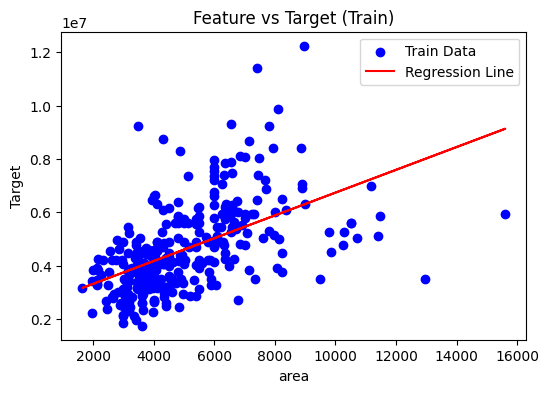

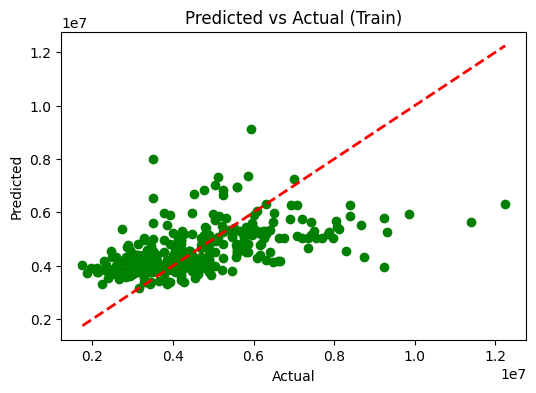

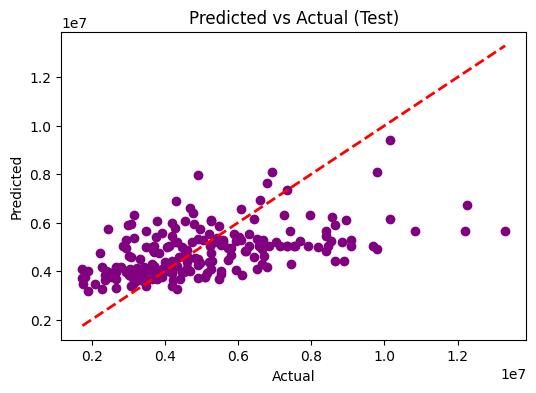


Results Dictionary:
{'Features': ['area'], 'Train_RMSE': 1378892.9977282803, 'Train_R2': 0.28375983372202596, 'Test_RMSE': 1846342.635453399, 'Test_R2': 0.2655671959513226, '#Features': 1}


In [87]:

DV = 'price'  
IVs = [col for col in df_clean.columns if col != DV]
results = run_one(df_clean, ['area'], DV)
print("\nResults Dictionary:")
print(results)


In [88]:
import itertools

In [89]:

def create_combinations(features):
    """
    Create all non-empty combinations of features
    """
    all_combinations = []
    for r in range(1, len(features)+1):
        combos = list(itertools.combinations(features, r))
        all_combinations.extend(combos)
    return all_combinations
features = [col for col in df_clean.columns if col != 'price']
all_combos = create_combinations(features)
print(f"Total combinations: {len(all_combos)}")


Total combinations: 15


Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1378892.9977, Train R²: 0.2838
Test RMSE: 1846342.6355, Test R²: 0.2656


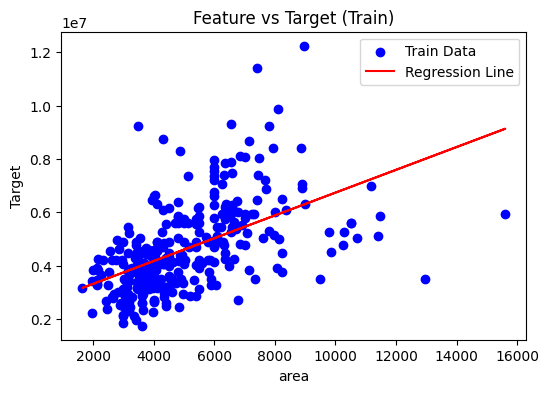

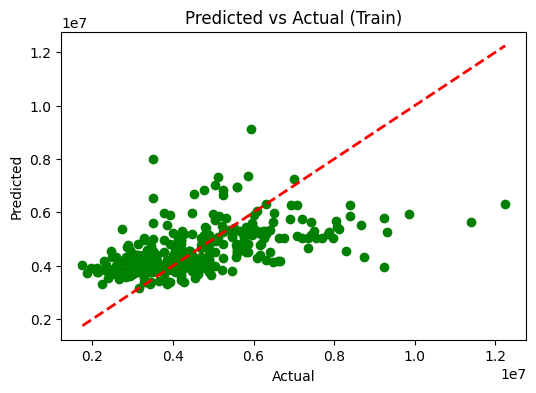

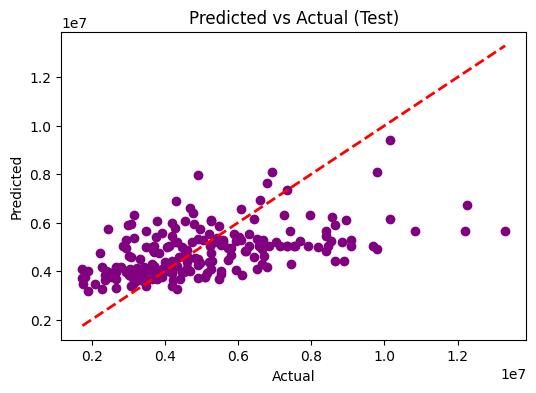

Summary Statistics:
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1518883.2948, Train R²: 0.1309
Test RMSE: 2044590.4372, Test R²: 0.0994


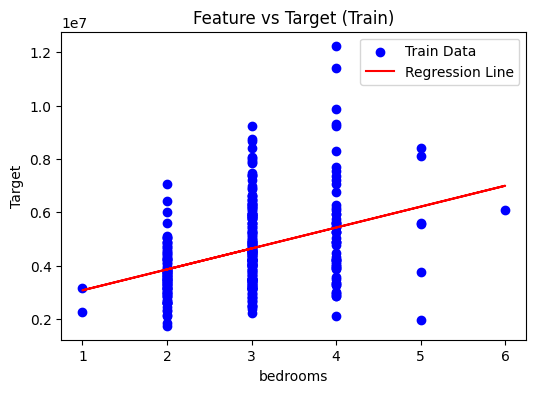

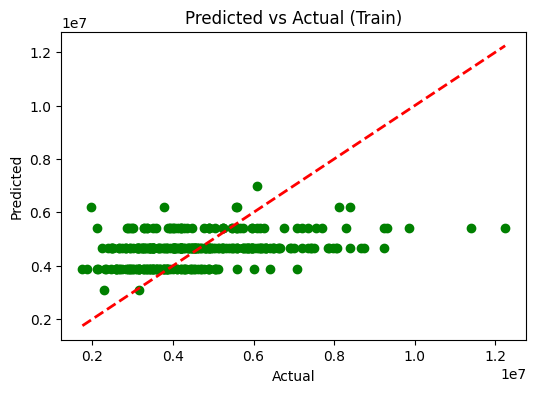

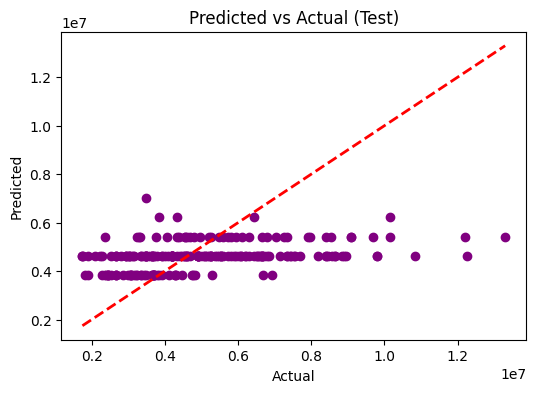

Summary Statistics:
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1450879.6655, Train R²: 0.2070
Test RMSE: 1815355.6770, Test R²: 0.2900


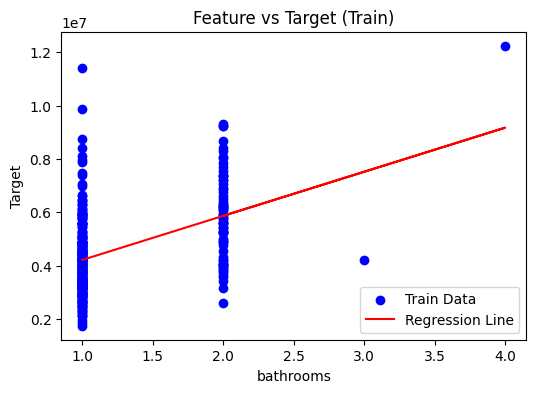

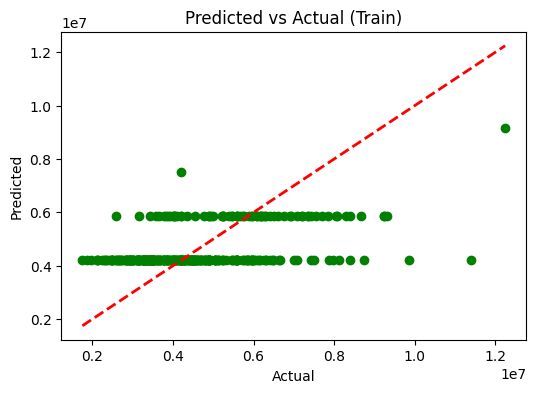

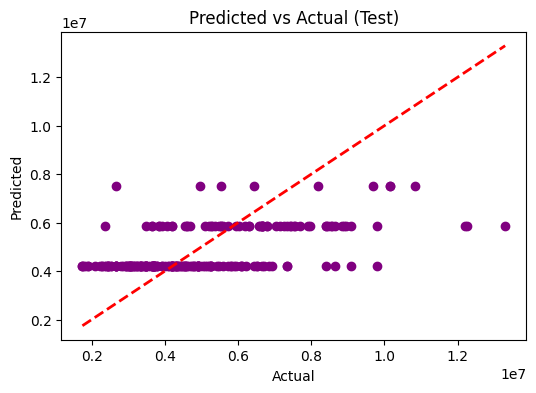

Summary Statistics:
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1499824.0309, Train R²: 0.1526
Test RMSE: 1974214.4341, Test R²: 0.1603


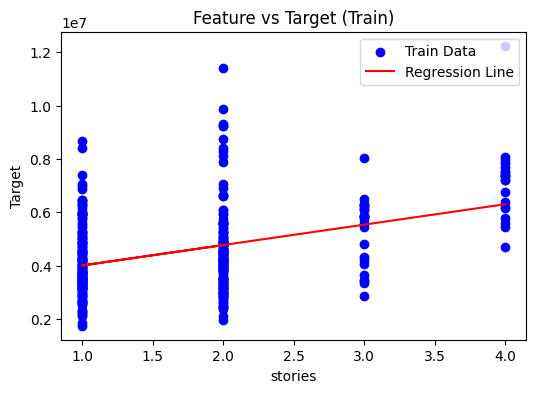

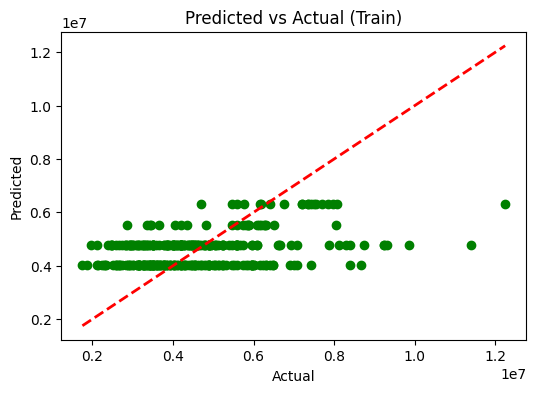

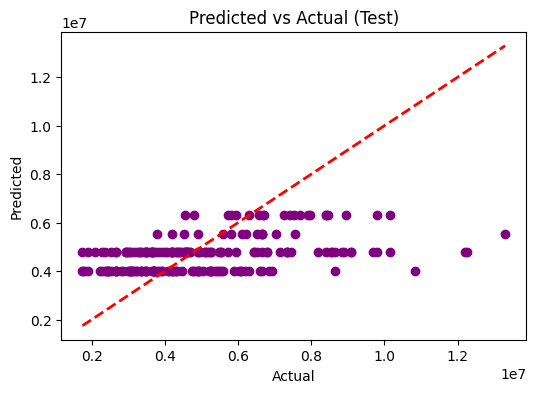

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1292818.7699, Train R²: 0.3704
Test RMSE: 1741480.9280, Test R²: 0.3466


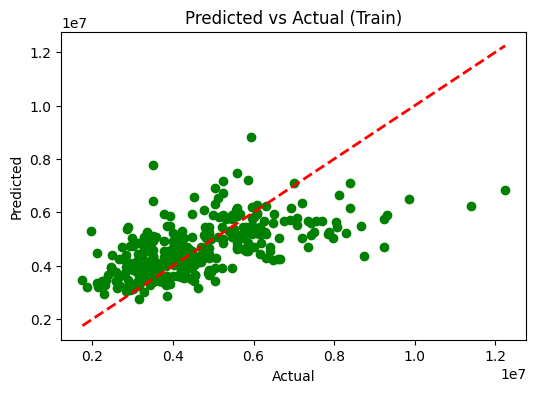

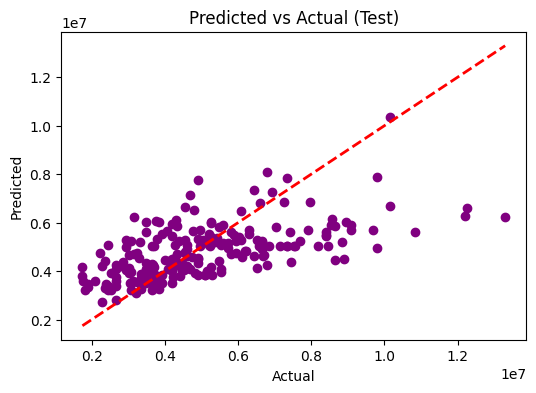

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1225707.8552, Train R²: 0.4341
Test RMSE: 1561841.5068, Test R²: 0.4745


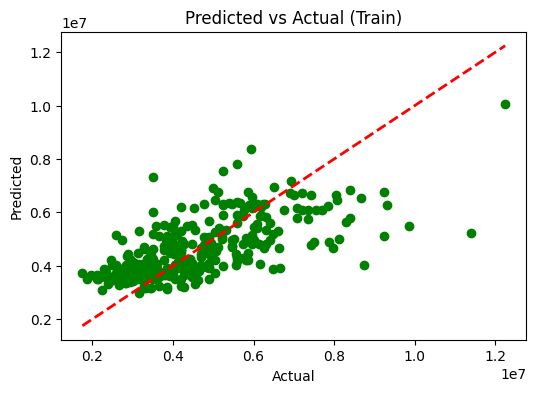

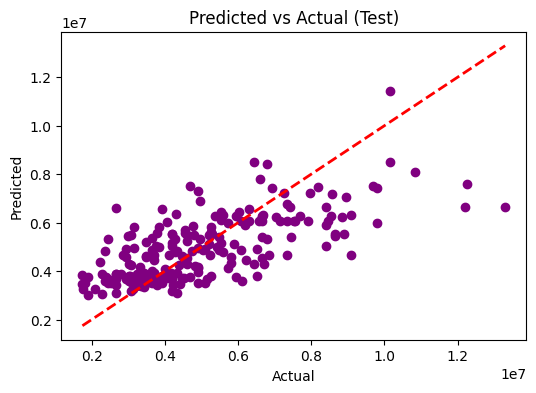

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1247839.2482, Train R²: 0.4134
Test RMSE: 1640473.6205, Test R²: 0.4202


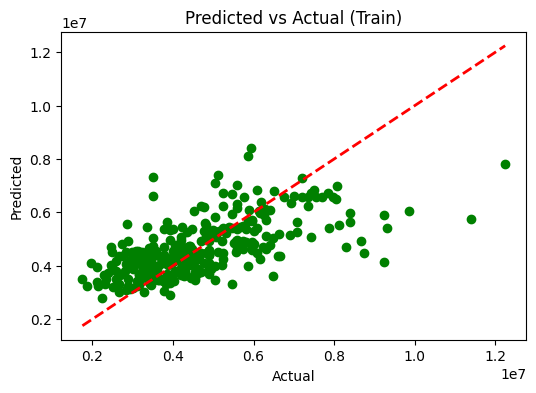

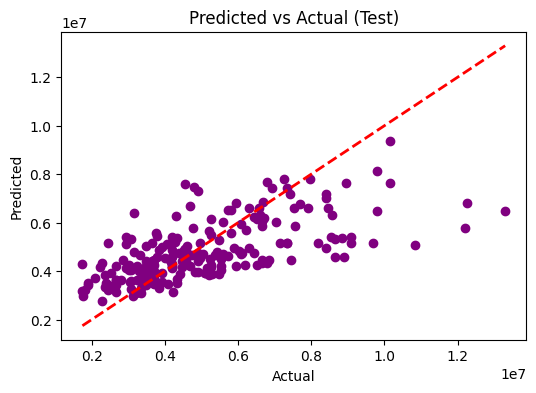

Summary Statistics:
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1410328.3634, Train R²: 0.2507
Test RMSE: 1783306.0217, Test R²: 0.3149


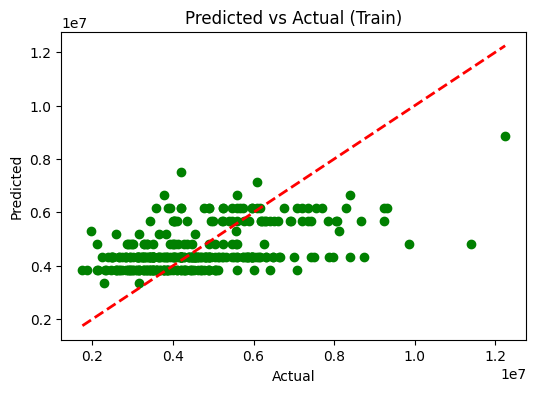

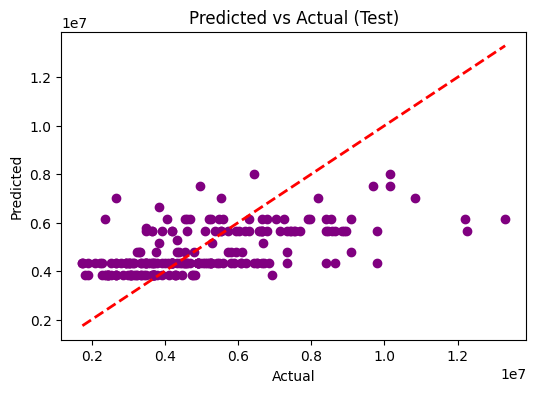

Summary Statistics:
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1456223.1140, Train R²: 0.2012
Test RMSE: 1924098.0862, Test R²: 0.2024


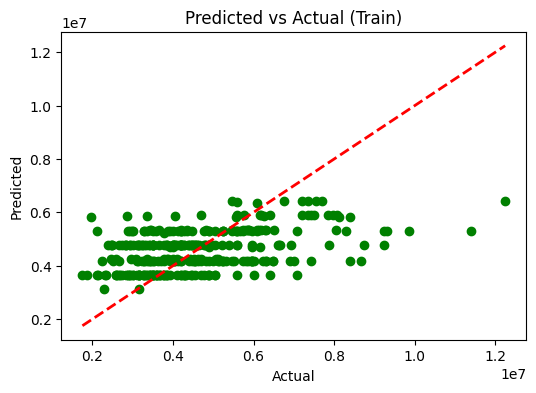

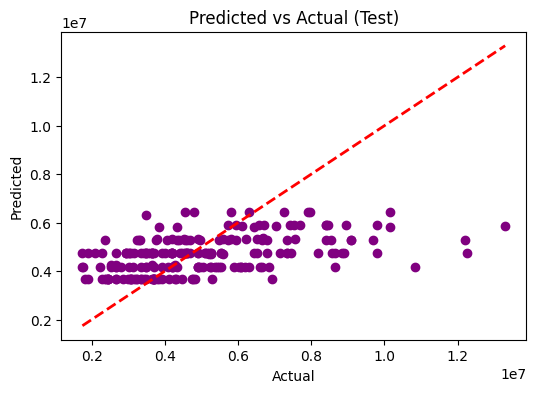

Summary Statistics:
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1387340.8901, Train R²: 0.2750
Test RMSE: 1719690.9298, Test R²: 0.3629


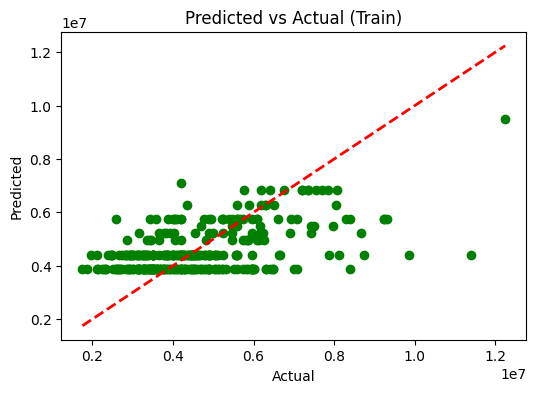

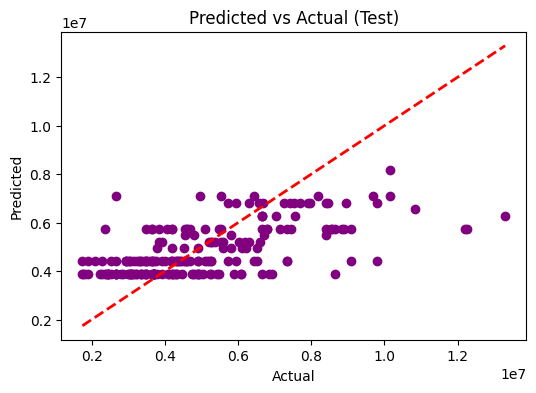

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1195135.0503, Train R²: 0.4619
Test RMSE: 1538422.6648, Test R²: 0.4901


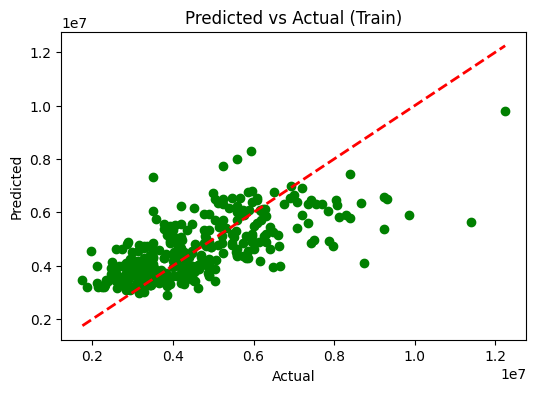

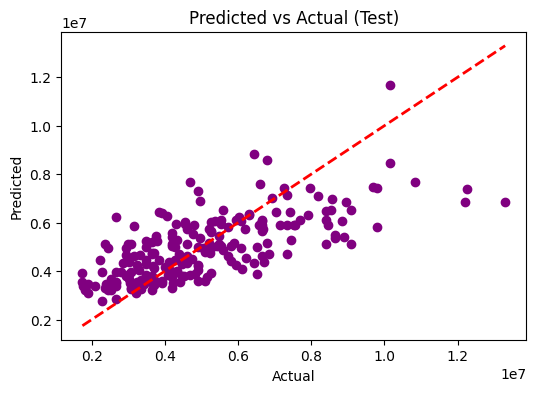

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1219910.0622, Train R²: 0.4394
Test RMSE: 1613814.1438, Test R²: 0.4389


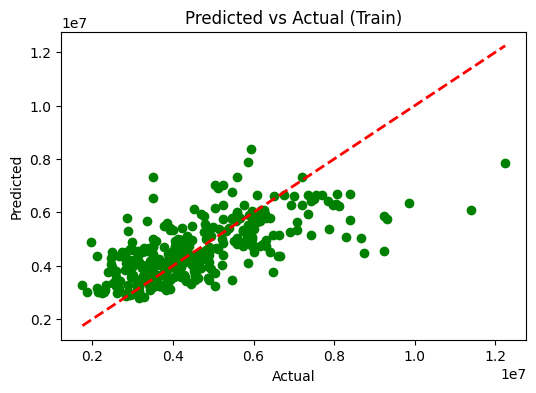

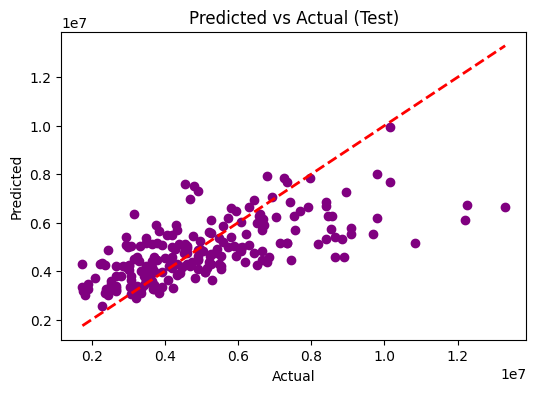

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1154766.3612, Train R²: 0.4977
Test RMSE: 1458558.4278, Test R²: 0.5417


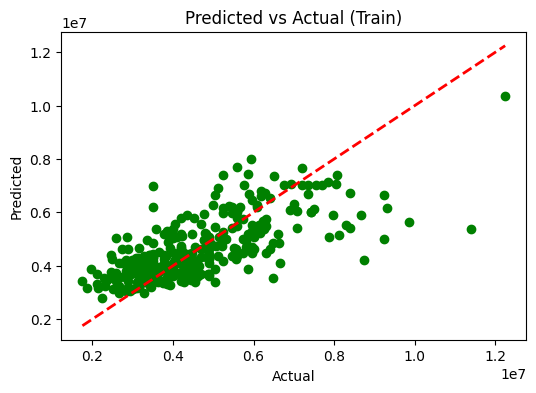

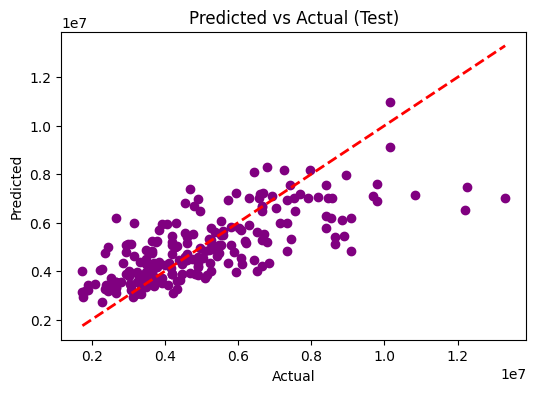

Summary Statistics:
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1371333.3690, Train R²: 0.2916
Test RMSE: 1713969.1550, Test R²: 0.3671


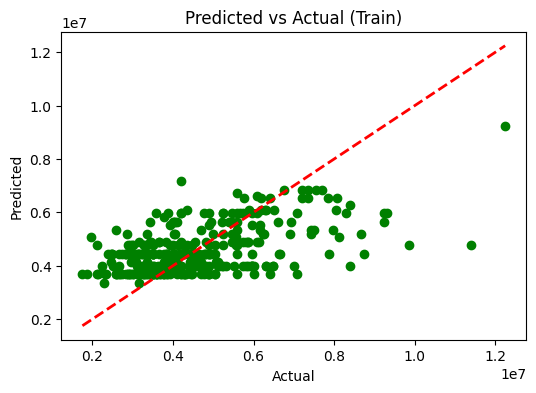

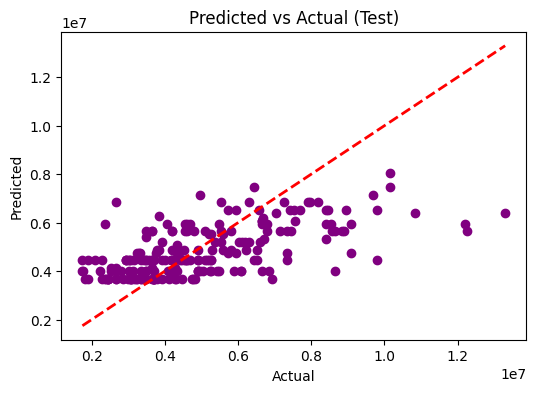

Summary Statistics:
area: {'Mean': 5150.54128440367, 'Variance': 4700870.7510478925, 'Range': 14550, 'Mode': 6000}
bedrooms: {'Mean': 2.9651376146788992, 'Variance': 0.54373874253009, 'Range': 5, 'Mode': 3}
bathrooms: {'Mean': 1.2862385321100918, 'Variance': 0.2520124568639004, 'Range': 3, 'Mode': 1}
stories: {'Mean': 1.8055045871559634, 'Variance': 0.7511623600707011, 'Range': 3, 'Mode': 2}
price: {'Mean': 4766729.247706422, 'Variance': 3492125008378.7007, 'Range': 11550000, 'Mode': 3500000}

Model Performance:
Train RMSE: 1145965.2631, Train R²: 0.5053
Test RMSE: 1456981.6501, Test R²: 0.5427


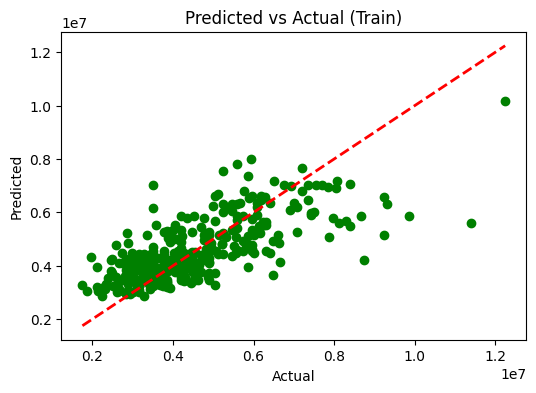

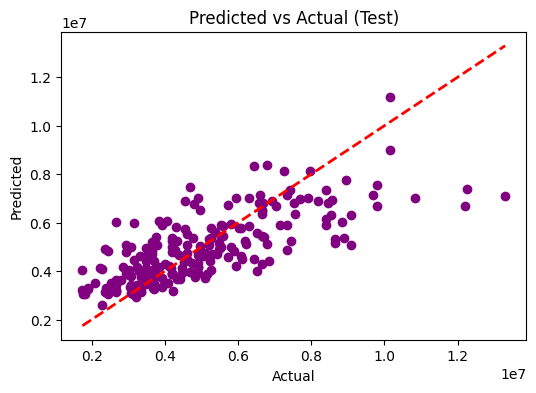

,Features,Train_RMSE,Train_R2,Test_RMSE,Test_R2,#Features,Feature_Combo
0,[area],1.378893e+06,0.283760,1.846343e+06,0.265567,1,[area]
1,[bedrooms],1.518883e+06,0.130947,2.044590e+06,0.099383,1,[bedrooms]
2,[bathrooms],1.450880e+06,0.207023,1.815356e+06,0.290012,1,[bathrooms]
3,[stories],1.499824e+06,0.152620,1.974214e+06,0.160316,1,[stories]
4,"[area, bedrooms]",1.292819e+06,0.370388,1.741481e+06,0.346621,2,"[area, bedrooms]"


In [90]:
# Store results for each combination
results_list = []

for combo in all_combos:
    IVs = list(combo)
    res = run_one(df_clean, IVs, 'price')  # Use the run_one function from above
    res['Feature_Combo'] = IVs
    results_list.append(res)

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results_list)
results_df.head()


In [91]:
# Sort by Test RMSE ascending and Test R2 descending
results_df['Score'] = results_df['Test_R2'] / results_df['Test_RMSE']  # optional scoring metric
top10 = results_df.sort_values(by='Score', ascending=False).head(10)
top10.reset_index(drop=True, inplace=True)
top10


,Features,Train_RMSE,Train_R2,Test_RMSE,Test_R2,#Features,Feature_Combo,Score
0,"[area, bedrooms, bathrooms, stories]",1.145965e+06,0.505302,1.456982e+06,0.542664,4,"[area, bedrooms, bathrooms, stories]",3.724575e-07
1,"[area, bathrooms, stories]",1.154766e+06,0.497674,1.458558e+06,0.541673,3,"[area, bathrooms, stories]",3.713758e-07
2,"[area, bedrooms, bathrooms]",1.195135e+06,0.461939,1.538423e+06,0.490107,3,"[area, bedrooms, bathrooms]",3.185778e-07
3,"[area, bathrooms]",1.225708e+06,0.434059,1.561842e+06,0.474465,2,"[area, bathrooms]",3.037858e-07
4,"[area, bedrooms, stories]",1.219910e+06,0.439400,1.613814e+06,0.438907,3,"[area, bedrooms, stories]",2.719690e-07
5,"[area, stories]",1.247839e+06,0.413437,1.640474e+06,0.420216,2,"[area, stories]",2.561555e-07
6,"[bedrooms, bathrooms, stories]",1.371333e+06,0.291592,1.713969e+06,0.367102,3,"[bedrooms, bathrooms, stories]",2.141826e-07
7,"[bathrooms, stories]",1.387341e+06,0.274957,1.719691e+06,0.362870,2,"[bathrooms, stories]",2.110087e-07
8,"[area, bedrooms]",1.292819e+06,0.370388,1.741481e+06,0.346621,2,"[area, bedrooms]",1.990383e-07
9,"[bedrooms, bathrooms]",1.410328e+06,0.250731,1.783306e+06,0.314860,2,"[bedrooms, bathrooms]",1.765598e-07


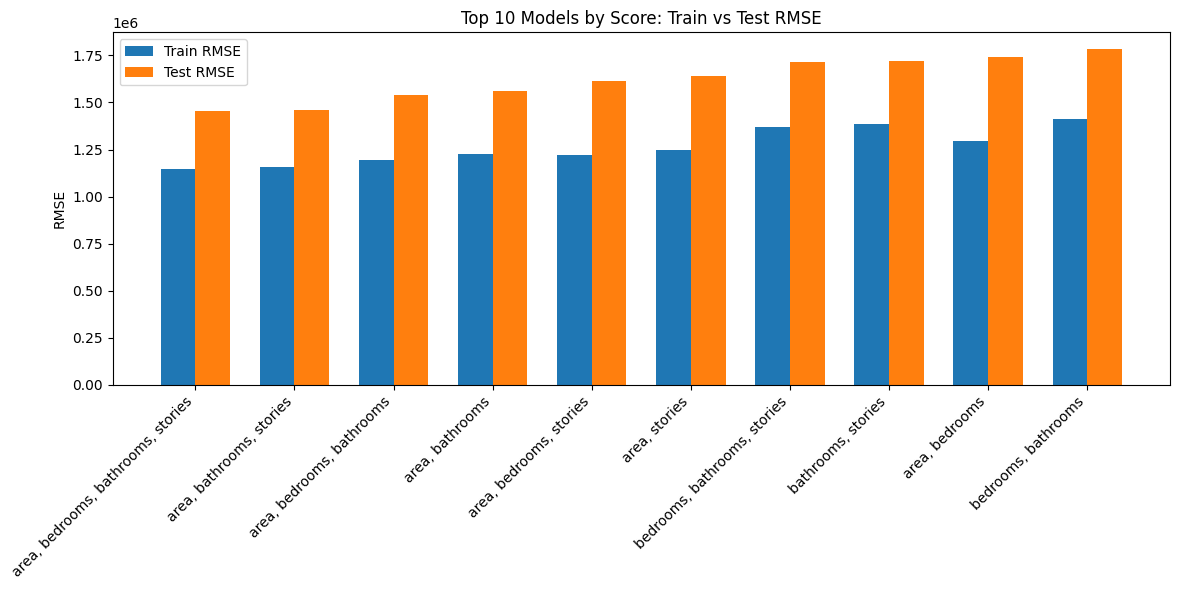

In [92]:
plt.figure(figsize=(12,6))
bar_width = 0.35
index = np.arange(len(top10))

plt.bar(index, top10['Train_RMSE'], bar_width, label='Train RMSE')
plt.bar(index + bar_width, top10['Test_RMSE'], bar_width, label='Test RMSE')

plt.xticks(index + bar_width/2, [', '.join(f) for f in top10['Feature_Combo']], rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('Top 10 Models by Score: Train vs Test RMSE')
plt.legend()
plt.tight_layout()
plt.show()


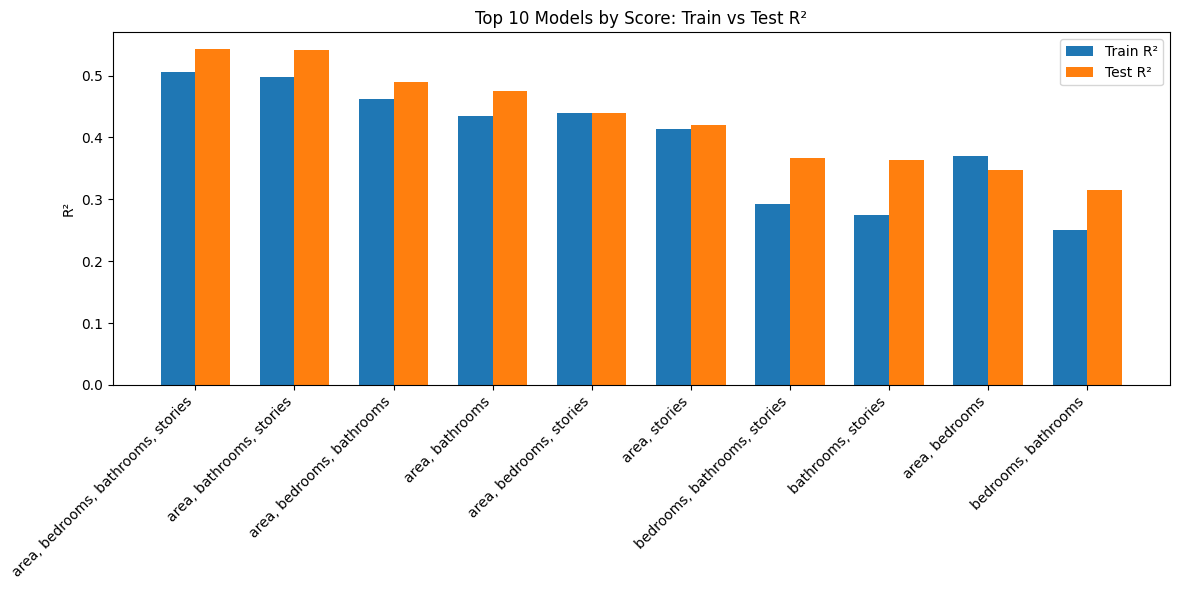

In [93]:
plt.figure(figsize=(12,6))
bar_width = 0.35
index = np.arange(len(top10))

plt.bar(index, top10['Train_R2'], bar_width, label='Train R²')
plt.bar(index + bar_width, top10['Test_R2'], bar_width, label='Test R²')

plt.xticks(index + bar_width/2, [', '.join(f) for f in top10['Feature_Combo']], rotation=45, ha='right')
plt.ylabel('R²')
plt.title('Top 10 Models by Score: Train vs Test R²')
plt.legend()
plt.tight_layout()
plt.show()


In [94]:
# Add feature count
top10['Num_Features'] = top10['#Features']

# Simple scoring: maximize R², minimize RMSE, penalize for many features
top10['Adjusted_Score'] = top10['Test_R2'] / top10['Test_RMSE'] / top10['Num_Features']

best_model = top10.sort_values(by='Adjusted_Score', ascending=False).iloc[0]
print("Best Model Combination Based on Adjusted Score:")
print("Features:", best_model['Feature_Combo'])
print(f"Train RMSE: {best_model['Train_RMSE']:.4f}, Test RMSE: {best_model['Test_RMSE']:.4f}")
print(f"Train R²: {best_model['Train_R2']:.4f}, Test R²: {best_model['Test_R2']:.4f}")
print("Number of Features:", best_model['Num_Features'])


Best Model Combination Based on Adjusted Score:
Features: ['area', 'bathrooms']
Train RMSE: 1225707.8552, Test RMSE: 1561841.5068
Train R²: 0.4341, Test R²: 0.4745
Number of Features: 2
